In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


In [3]:
# Load the dataset
df_sola_train = pd.read_csv('Plant_Prediction_Data_Grouped.csv')
df_sola_train.head()


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,2222.724459,6.449816e+08,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,0.0,1290.954545,6.449816e+08,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,0.0,1290.954545,6.449816e+08,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,0.0,1290.954545,6.449816e+08,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,0.0,1205.272727,6.449816e+08,26.596148,25.088210,0.0


In [4]:
df_sola_train['DATE_TIME'] = pd.to_datetime(df_sola_train['DATE_TIME'])
df_sola_train['YEAR'] = df_sola_train['DATE_TIME'].dt.year
df_sola_train['MONTH'] = df_sola_train['DATE_TIME'].dt.month
df_sola_train['DAY'] = df_sola_train['DATE_TIME'].dt.day
df_sola_train['HOUR'] = df_sola_train['DATE_TIME'].dt.hour
df_sola_train['MINUTE'] = df_sola_train['DATE_TIME'].dt.minute

# Drop the original DATE_TIME column
df_sola_train.drop(columns=['DATE_TIME'], inplace=True)
# Check for missing values
missing_values = df_sola_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
YEAR                   0
MONTH                  0
DAY                    0
HOUR                   0
MINUTE                 0
dtype: int64


In [5]:
df_sola_train.drop(columns=['TOTAL_YIELD'], inplace=True)
df_sola_train.head()

,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,YEAR,MONTH,DAY,HOUR,MINUTE
0,0.0,0.0,2222.724459,27.004764,25.060789,0.0,2020,5,15,0,0
1,0.0,0.0,1290.954545,26.880811,24.421869,0.0,2020,5,15,0,15
2,0.0,0.0,1290.954545,26.682055,24.427290,0.0,2020,5,15,0,30
3,0.0,0.0,1290.954545,26.500589,24.420678,0.0,2020,5,15,0,45
4,0.0,0.0,1205.272727,26.596148,25.088210,0.0,2020,5,15,1,0


In [6]:
x = df_sola_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df_sola_train['AC_POWER']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10002.17007604515
R^2 Score: 0.9165777751341508


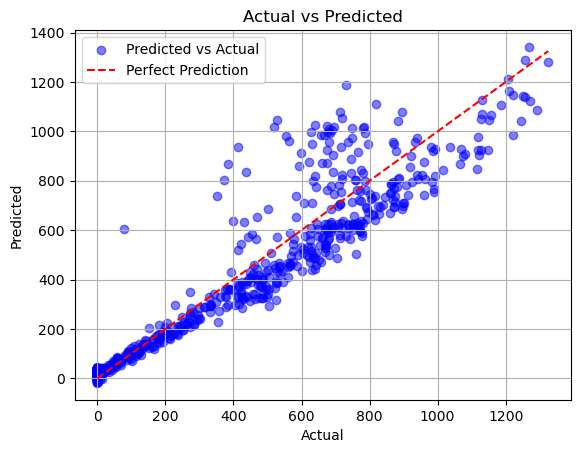

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual',alpha=0.5)  # จุดสีน้ำเงิน
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # เส้นทแยงมุมสีแดง
plt.xlabel("Actual", color='black')
plt.ylabel("Predicted", color='black')
plt.title("Actual vs Predicted", color='black')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model_Rf = RandomForestRegressor(n_estimators=20000, random_state=42)
model_Rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20000, random_state=42)

In [11]:
y_pred_rf = model_Rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 5432.654904024159
R^2 Score (Random Forest): 0.9546894168389048


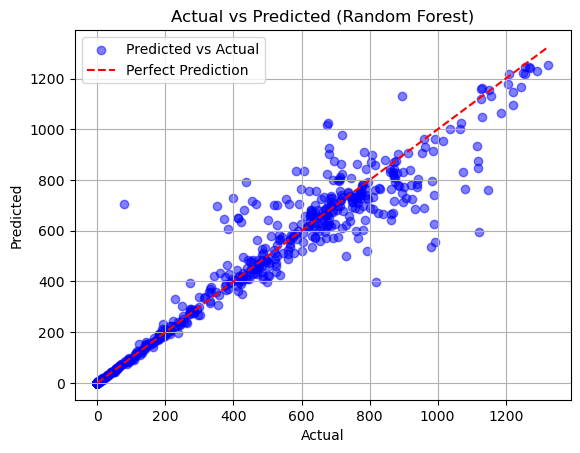

In [12]:
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual',alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual", color='black')
plt.ylabel("Predicted", color='black')
plt.title("Actual vs Predicted (Random Forest)", color='black')
plt.legend()
plt.grid(True)
plt.show()